# Notebook de ejecucion del proyecto de generacion de reporte
## De los contenidos del notebook saldrá el script final
### Se añadiran explicaciones pertinentes tanto en md como en comentarios del codigo

El objetivo de este proyecto es el uso de las librerias pypdf y reportlab para generar un reporte automático en pdf, como ejemplo de datos se utilizan los provenientes del archivo Financial Sample.csv, que se trataran con pandas y se generarán graficos con matplotlib.

### Importamos las librerias

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from reportlab.pdfgen import canvas
from reportlab.platypus import Table, TableStyle
from reportlab.lib.colors import *

### Cargamos los datos del csv  

In [72]:
df = pd.read_csv('data/Financial Sample.csv')   

### Analizamos el df y vemos los insights y gráficas que vamos a extraer

In [73]:
df.shape

(700, 16)

In [74]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Channel Partners,United States of America,Carretera,High,$386.00,$3.00,$12.00,"$4,632.00",$463.20,"$4,168.80","$1,158.00","$3,010.80",10/1/2013,10,October,2013
1,Government,United States of America,Montana,High,"$2,328.00",$5.00,$7.00,"$16,296.00","$1,629.60","$14,666.40","$11,640.00","$3,026.40",9/1/2014,9,September,2014
2,Channel Partners,United States of America,Paseo,High,$386.00,$10.00,$12.00,"$4,632.00",$463.20,"$4,168.80","$1,158.00","$3,010.80",10/1/2013,10,October,2013
3,Enterprise,United States of America,Carretera,High,"$3,445.50",$3.00,$125.00,"$430,687.50","$43,068.75","$387,618.75","$413,460.00","$(25,841.25)",4/1/2014,4,April,2014
4,Enterprise,France,Carretera,High,"$1,482.00",$3.00,$125.00,"$185,250.00","$18,525.00","$166,725.00","$177,840.00","$(11,115.00)",12/1/2013,12,December,2013


In [75]:
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

Quitamos los espacios en el nombre de las columnas

In [76]:
columnas = []
for column in df.columns:
    columnas.append(column.strip())
print(columnas)
df.columns = columnas

['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name', 'Year']


In [77]:
df.Country.value_counts()

Country
United States of America    140
France                      140
Mexico                      140
Germany                     140
Canada                      140
Name: count, dtype: int64

Analizamos los tipos de cada columna del df

In [78]:
df.dtypes

Segment                object
Country                object
Product                object
Discount Band          object
Units Sold             object
Manufacturing Price    object
Sale Price             object
Gross Sales            object
Discounts              object
Sales                  object
COGS                   object
Profit                 object
Date                   object
Month Number            int64
Month Name             object
Year                    int64
dtype: object

Revisamos la columna Discounts debido a que su columna categorica Discount Band tiene valores nulos, entonces nos podemos imaginar que Discounts puede tener valores nulos o raros

In [79]:
print(df.Discounts.unique())

[' $463.20 ' ' $1,629.60 ' ' $43,068.75 ' ' $18,525.00 ' ' $80,955.00 '
 ' $22,550.00 ' ' $3,108.00 ' ' $3,908.00 ' ' $17,730.00 ' ' $3,250.50 '
 ' $482.00 ' ' $1,021.50 ' ' $765.00 ' ' $1,185.00 ' ' $22,365.00 '
 ' $19,950.00 ' ' $68,820.00 ' ' $1,865.50 ' ' $23,950.00 ' ' $25,590.00 '
 ' $4,262.50 ' ' $961.50 ' ' $98,245.00 ' ' $12,960.00 ' ' $31,612.50 '
 ' $65,450.00 ' ' $7,237.50 ' ' $78,400.00 ' ' $89,790.00 ' ' $4,224.60 '
 ' $4,078.00 ' ' $3,088.80 ' ' $24,745.00 ' ' $1,581.36 ' ' $1,949.64 '
 ' $633.60 ' ' $623.04 ' ' $1,215.83 ' ' $1,326.60 ' ' $5,279.18 '
 ' $2,556.84 ' ' $30,492.00 ' ' $92,763.00 ' ' $33,563.75 ' ' $2,574.00 '
 ' $2,083.62 ' ' $29,491.00 ' ' $6,582.40 ' ' $3,559.05 ' ' $28,809.00 '
 ' $2,468.40 ' ' $81,023.25 ' ' $5,314.32 ' ' $3,201.66 ' ' $5,266.80 '
 ' $3,273.60 ' ' $45,078.00 ' ' $6,171.00 ' ' $1,080.75 ' ' $13,244.00 '
 ' $1,392.16 ' ' $2,288.88 ' ' $7,617.50 ' ' $6,457.00 ' ' $43,518.75 '
 ' $5,783.80 ' ' $19,703.75 ' ' $13,021.25 ' ' $292.60 ' ' $37,

Sustituimos el valor  $-\u2007\u2007  por 0

In [80]:
df.Discounts = df.Discounts.replace(" $-\u2007\u2007 ","0")
df.Discounts.value_counts

<bound method IndexOpsMixin.value_counts of 0          $463.20 
1        $1,629.60 
2          $463.20 
3       $43,068.75 
4       $18,525.00 
           ...     
695               0
696               0
697               0
698               0
699               0
Name: Discounts, Length: 700, dtype: object>

Hacemos lo mismo para todo el df

In [81]:
for col in df.columns:
    df[col] = df[col].replace(" $-\u2007\u2007 ","0")

Las columnas Units Sold, Manufacturing Price, Sale Price, Gross Sales, Discounts, Sales, COGS y Profit las tenemos que convertir a columnas numéricas.

In [82]:
columnas_numericas = ["Units Sold", "Manufacturing Price", "Sale Price", "Gross Sales", "Discounts", "Sales","COGS", "Profit"]
try:
    for col in columnas_numericas:
        for value in df[col]:
            value_numerico = value.replace("$", "")
            value_numerico = value_numerico.replace(",", "")
            value_numerico = value_numerico.replace("(", "-")
            value_numerico = value_numerico.replace(")", "")
            df[col] = df[col].replace(value, float(value_numerico))
            
except ValueError:
        print(f"Error producido por {value},{value_numerico}, en la columna {col}")

C:\Users\vicbr\AppData\Local\Temp\ipykernel_9320\2109172472.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(value, float(value_numerico))


In [83]:
df.dtypes

Segment                 object
Country                 object
Product                 object
Discount Band           object
Units Sold             float64
Manufacturing Price    float64
Sale Price             float64
Gross Sales            float64
Discounts              float64
Sales                  float64
COGS                   float64
Profit                 float64
Date                    object
Month Number             int64
Month Name              object
Year                     int64
dtype: object

Vamos a sacar los siguientes datos sobre el dataset:
- Ventas brutas por país
- Promedio ventas
- Profit total
- Margen de profit 
- Ingresos totales por país
- Promedio de profit

In [84]:
ventas_brutas_por_pais = df.groupby("Country")["Gross Sales"].sum().round(0)
ventas_brutas_por_pais.name = "Ventas Brutas (€)"
ventas_brutas_por_pais

Country
Canada                      26932164.0
France                      26081674.0
Germany                     24921468.0
Mexico                      22726935.0
United States of America    27269358.0
Name: Ventas Brutas (€), dtype: float64

In [85]:
promedio_ventas = df.groupby("Country")["Gross Sales"].mean().round(0)
promedio_ventas.name = "Promedio Ventas (€)"
promedio_ventas

Country
Canada                      192373.0
France                      186298.0
Germany                     178010.0
Mexico                      162335.0
United States of America    194781.0
Name: Promedio Ventas (€), dtype: float64

In [86]:
total_profit = df.groupby("Country")["Profit"].sum().round(0)
total_profit.name = "Ganancias totales (€)"
total_profit

Country
Canada                      3529229.0
France                      3781021.0
Germany                     3680389.0
Mexico                      2907523.0
United States of America    2995541.0
Name: Ganancias totales (€), dtype: float64

In [87]:
df["Profit_margin"] = df["Profit"]/df["Gross Sales"]
margen_ganancia_medio_por_pais = df.groupby("Country")["Profit_margin"].mean().round(6)*100
margen_ganancia_medio_por_pais.name = "Margen de ganancia medio (%)"
margen_ganancia_medio_por_pais

Country
Canada                      25.7194
France                      26.2337
Germany                     26.5765
Mexico                      25.4622
United States of America    25.9765
Name: Margen de ganancia medio (%), dtype: float64

In [88]:
df['Ingresos'] = df['Sale Price'] * df['Units Sold']
ingresos_totales_por_pais = df.groupby('Country')['Ingresos'].sum().round(0)
ingresos_totales_por_pais.name = "Ingresos totales (€)"
ingresos_totales_por_pais

Country
Canada                      26932164.0
France                      26081674.0
Germany                     24921468.0
Mexico                      22726935.0
United States of America    27269358.0
Name: Ingresos totales (€), dtype: float64

In [89]:
ganancias_totales_por_pais = df.groupby('Country')['Profit'].mean().round(0)
ganancias_totales_por_pais.name = "Ganancias totales (€)"
ganancias_totales_por_pais

Country
Canada                      25209.0
France                      27007.0
Germany                     26288.0
Mexico                      20768.0
United States of America    21397.0
Name: Ganancias totales (€), dtype: float64

### Creamos el df con los datos

In [90]:
df_datos = pd.DataFrame(data = [ventas_brutas_por_pais, promedio_ventas, total_profit, margen_ganancia_medio_por_pais, ingresos_totales_por_pais, ganancias_totales_por_pais])
df_datos.columns = ["Canada", "France", "Germany", "Mexico", "USA"]

### Creamos la tabla para introducir en el pdf con reportlab.platypus

In [91]:
lista_filas = [["Estadísticas","Canada", "France", "Germany", "Mexico", "USA"]]
lista_filas_data = df_datos.values.tolist()
for i,value in enumerate(lista_filas_data[3]):
    value = round(value,2)
    lista_filas_data[3][i] = value
nombre_filas = df_datos.index.tolist()
for index_fila, lista in enumerate(lista_filas_data):
    base = [nombre_filas[index_fila]]
    base.extend(lista)
    lista_filas.append(base)
tabla = Table(lista_filas, colWidths = [200,70,70,70,70], rowHeights= [35,25,25,25,25,25,25] )
print(tabla)

Table(
 rowHeights=[35, 25, 25, 25, 25, 25, 25],
 colWidths=[200, 70, 70, 70, 70, 70],
[['Estadísticas', 'Canada', 'France', 'Germany', 'Mexico', 'USA'],
   ['Ventas Brutas (€)',
    26932164.0,
    26081674.0,
    24921468.0,
    22726935.0,
    27269358.0],
   ['Promedio Ventas (€)', 192373.0, 186298.0, 178010.0, 162335.0, 194781.0],
   ['Ganancias totales (€)',
    3529229.0,
    3781021.0,
    3680389.0,
    2907523.0,
    2995541.0],
   ['Margen de ganancia medio (%)', 25.72, 26.23, 26.58, 25.46, 25.98],
   ['Ingresos totales (€)',
    26932164.0,
    26081674.0,
    24921468.0,
    22726935.0,
    27269358.0],
   ['Ganancias totales (€)', 25209.0, 27007.0, 26288.0, 20768.0, 21397.0]]
) # end table


### Estilizamos la tabla con TableStyles

In [92]:
estilos = TableStyle([("BACKGROUND", (0, 0), (-1, 0), brown),
                      ("GRID", (0,0), (-1,-1),1, black),
                      ("TEXTCOLOR", (0,0), (-1,0), white),
                      ("ALINGMENT", (0,0), (-1,-1), "CENTER"),
                      ("FONTSIZE", (0,0), (-1,0), 15),
                      ("VALIGN", (0,0), (-1,-1), "MIDDLE"),
                      ("FONTNAME", (0,0), (-1,0), "Helvetica-Bold"),
                      ])
tabla.setStyle(estilos)


In [93]:
c = canvas.Canvas("output/tabla.pdf")
tabla.wrapOn(c, 1000, 1000)
tabla.drawOn(c,25, 500)
c.save()

### Creamos los gráficos con matplotlib

Los gráficos que crearemos serán los siguientes:
- Gráfico de barras de Gross sales y profits entre paises
- ScatterPlot de Gross sales y profits por pais
- PieChart de margen de ganancia medio
- Gráfico de barras de ganancias totales

####  Gráfico de barras de Gross sales y profits entre paises

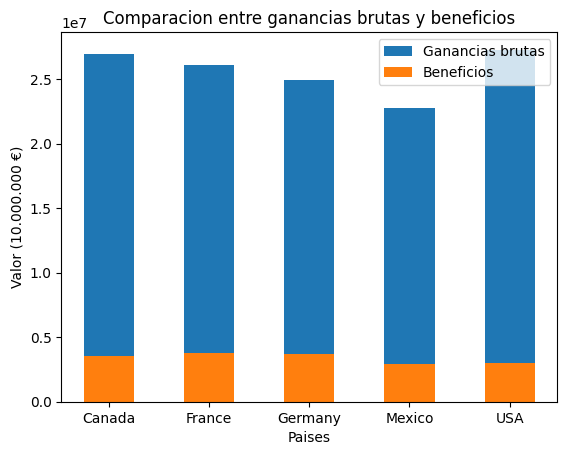

In [134]:
df_datos_values = df_datos.values.tolist()
plt.bar(df_datos.columns, df_datos_values[0], width= 0.5)
plt.bar(df_datos.columns, df_datos_values[2], width= 0.5)
plt.xlabel("Paises")
plt.ylabel("Valor (10.000.000 €)")
plt.legend(["Ganancias brutas", "Beneficios"])
plt.title("Comparacion entre ganancias brutas y beneficios")
plt.savefig("output/Barras_Ganancias_Beneficios")

### Scatterplot de gross sales y profits

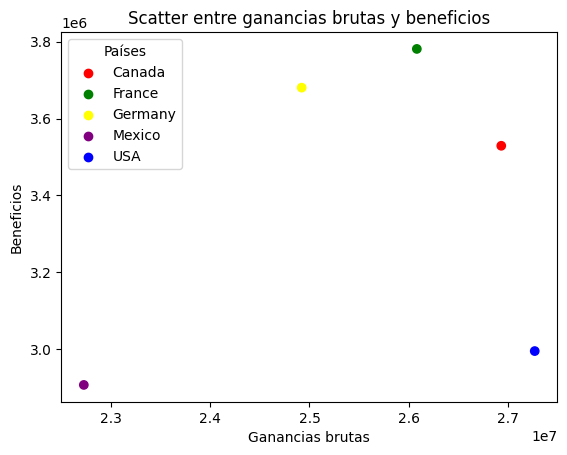

In [95]:
color = ["red","green","yellow","purple","blue"]
paises = ["Canada", "France", "Germany", "Mexico", "USA"]
plt.scatter(df_datos_values[0], df_datos_values[2], c = color)
plt.xlabel("Ganancias brutas")
plt.ylabel("Beneficios")
for col, pais in zip(color,paises):
    plt.scatter([],[], color = col, label = pais)
plt.legend(title = "Países")
plt.title("Scatter entre ganancias brutas y beneficios")
plt.savefig("output/Scatter_Ganancias_Beneficios")

### PieChart de margen de ganancia medio

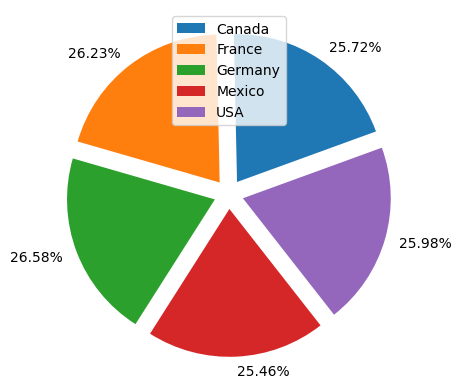

In [96]:
explode = [0.1,0.1,0.1,0.1,0.1]
labels = df_datos_values[3]
labels_str = []
for label in labels:
    labels_str.append(str(round(label,2)) + "%")
plt.pie(df_datos_values[3], labels = labels_str, explode = explode, startangle = 20)
plt.legend(paises, loc = "upper center")
plt.savefig("output/pie_Ganancias_Beneficios")

### Grafico de barras de ganancias totales

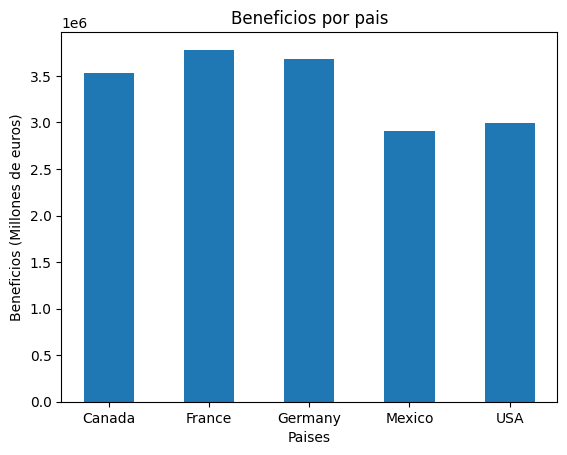

In [98]:
plt.bar(df_datos.columns, df_datos_values[2], width= 0.5)
plt.title("Beneficios por pais")
plt.ylabel("Beneficios (Millones de euros)")
plt.xlabel("Paises")
plt.savefig("output/Barras_Beneficios")

### Creamos el pdf con reportlab.canvas

In [158]:
from reportlab.lib.pagesizes import A4
c = canvas.Canvas("output/reporte_final.pdf", pagesize = A4)
width, height = A4
print(width, height)
c.setFont("Helvetica-Bold", 20)
c.drawCentredString(y = height - 50, x = width/2, text = "Reporte de Financial Sample")
c.setFont("Helvetica-Bold", 15)
c.drawCentredString(y = height - 80, x = width/2, text = "Autor: Victor Brown Sogorb")
c.setFont("Helvetica", 13)
c.drawString(y = height - 130, x = 40, text = "Tabla informativa del reporte:")
tabla.wrapOn(c, 1000, 1000)
tabla.drawOn(c,25, 500)
c.drawString(y = height -390, x = 40, text = "Gráficas informativas de los datos:") 
c.drawString(y = height - 420, x = 40, text = "Beneficios por país:")
c.drawImage("output/Barras_Beneficios.png", x = 50, y = 30, height = 360, width = 480) #480,640
c.drawString(y = 10, x = width - 20, text = "1")
c.drawImage("data/7145.jpg", x = 30, y = height - 110, height = 100, width = 100)
c.showPage()
c.drawString(y = height - 50, x = 40, text = "Ganancias brutas y beneficios por país:")
c.drawImage("output/Barras_Ganancias_Beneficios.png", x = 50, y = 430, height = 360, width = 480) 
c.drawString(y = height - 450, x = 40, text = "Margen de ganancia por país:")
c.drawImage("output/pie_Ganancias_Beneficios.png", x = 50, y = 0, height = 360, width = 480)
c.drawString(y = 10, x = width - 20, text = "2")
c.showPage()
c.drawString(y = height - 50, x = 40, text = "Scatter entre ganancias brutas y beneficios:")
c.drawImage("output/Scatter_Ganancias_Beneficios.png", x = 50, y = 430, height = 360, width = 480) 
c.drawString(y = 10, x = width - 20, text = "3")
c.save()

595.2755905511812 841.8897637795277
